# Exploratory Data Analysis

We will use the Titanic Dataset for the ML competition on Kaggle (https://www.kaggle.com/competitions/titanic/overview)

The competition is simple: we want you to use the Titanic passenger data (name, age, price of ticket, etc) to try to predict who will survive and who will die.

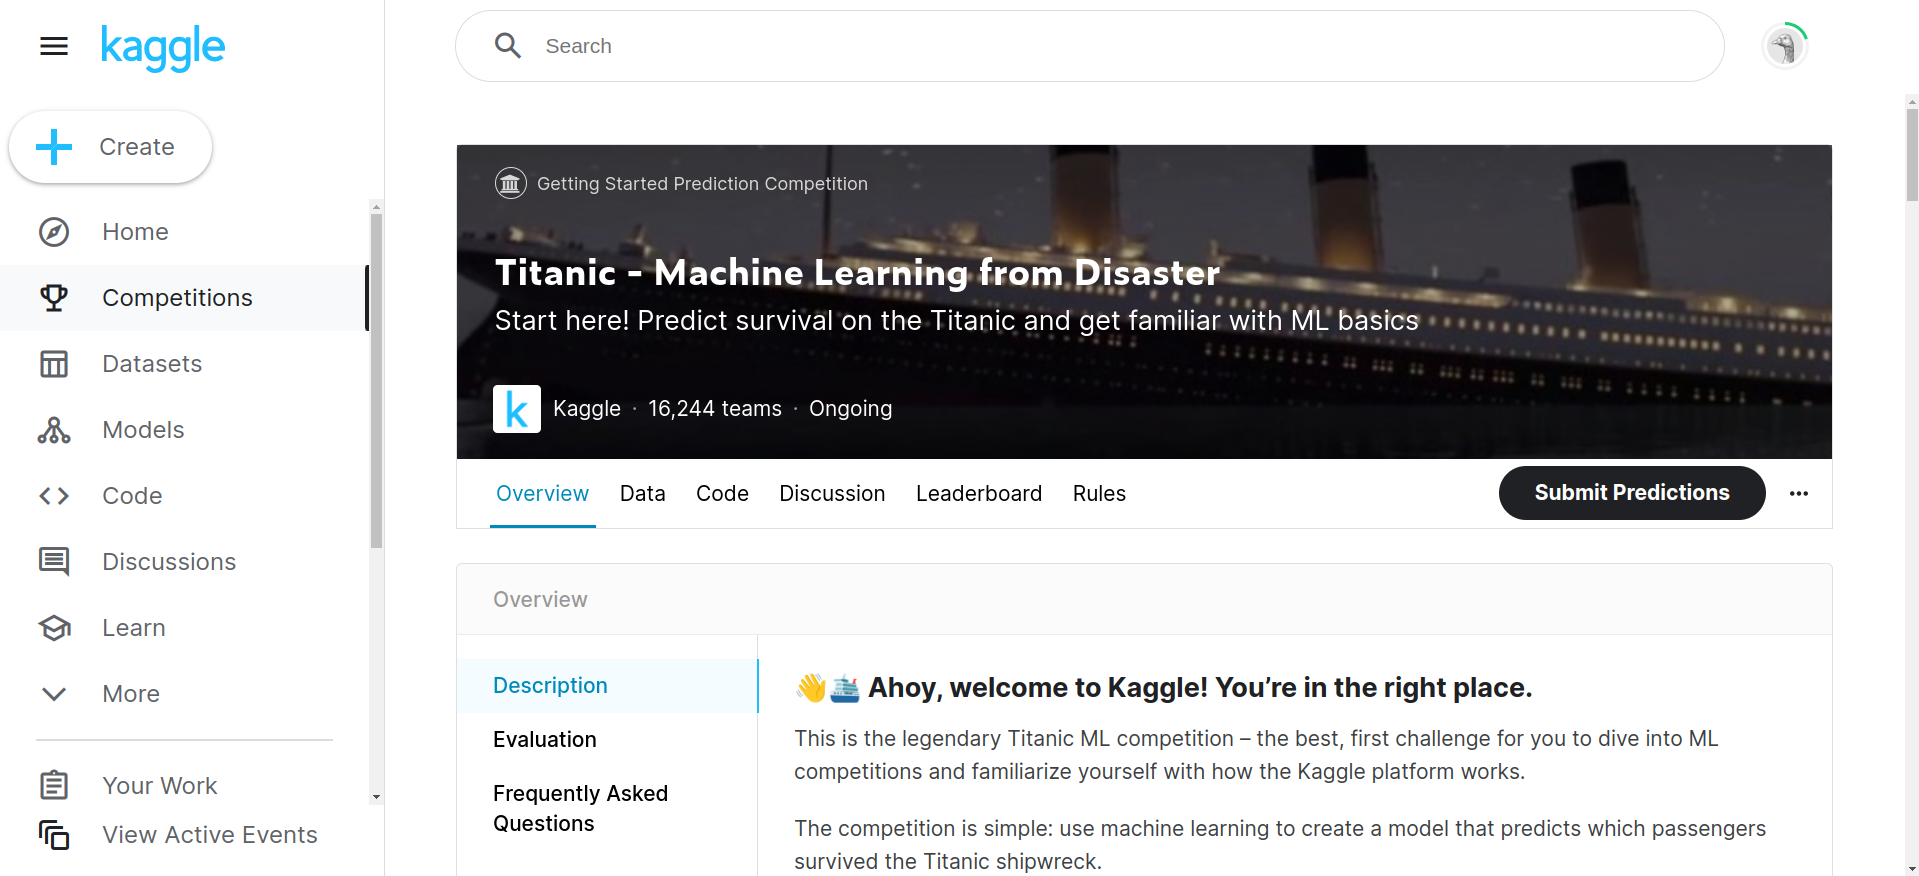

In [75]:
from IPython import display
display.Image("Image/Kaggle.png")

## Load the training dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

#Load the data
train_df = pd.read_csv('Data/Titanic/train.csv')
test_df = pd.read_csv('Data/Titanic/test.csv')

## Explore the data

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **VARIABLE DESCRIPTIONS**

* `PassengerId` is the unique id of the row and it doesn't have any effect on target
* `Survived` is the target variable we are trying to predict (**0** or **1**):
    - **1 = Survived**
    - **0 = Not Survived**
* `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has **3** unique values (**1**,  **2 **or **3**):
    - **1 = Upper Class**
    - **2 = Middle Class**
    - **3 = Lower Class**
* `Name`, `Sex` and `Age` are self-explanatory
* `SibSp` is the total number of the passengers' siblings and spouse
* `Parch` is the total number of the passengers' parents and children
* `Ticket` is the ticket number of the passenger
* `Fare` is the passenger fare
* `Cabin` is the cabin number of the passenger
* `Embarked` is port of embarkation and it is a categorical feature which has **3** unique values (**C**, **Q** or **S**):
    - **C = Cherbourg**
    - **Q = Queenstown**
    - **S = Southampton**

In [4]:
# Shape of dataset
train_df.shape

(891, 12)

In [5]:
#Basic information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Describe the data
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Missing Value and Duplicated

In [7]:
#Find the duplicates
train_df.duplicated().sum()

0

In [8]:
def count_null(df):
    null_df = pd.DataFrame(df.isnull().sum(), columns=["Count"])
    return null_df[null_df["Count"] > 0]

In [9]:
count_null(train_df)

,Count
Age,177
Cabin,687
Embarked,2


### Cabin Feature

**Hypothesis** : Assume that all the passengers who are travelling without a personal cabin have a missing Cabin value. This is a reasonable hypothesis. Let’s update the missing cabin value as “X”

In [10]:
train_df["Cabin"] = train_df["Cabin"].apply(lambda x: "X" if pd.isnull(x) or x == "T" else x)
train_df["Cabin"].head()

0       X
1     C85
2       X
3    C123
4       X
Name: Cabin, dtype: object

### Embarked Feature

**Hypothesis** : Since only 2 are missing we can assume that the one missing are the one that appear more often

In [11]:
# Replace Port missing with the mode
train_df.loc[train_df['Embarked'].isnull(), 'Embarked'] = train_df["Embarked"].mode()[0]

### Age Feature

In [12]:
# Let's visualize the Age attribute
train_df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

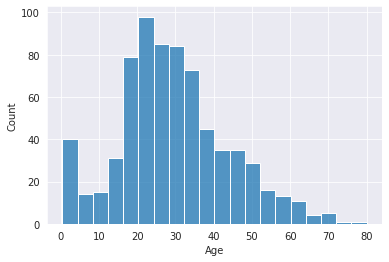

In [13]:
import seaborn
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.histplot(data=train_df,x='Age')
plt.show()

In [14]:
## filling na Age value as mean of overall age column
train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)

In [15]:
import seaborn
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.histplot(data=train_df,x='New_Age')
plt.show()

ValueError: Could not interpret value `New_Age` for parameter `x`

In [16]:
# Check again Count Null
count_null(train_df)

,Count


## Correlation Plot

<Axes: >

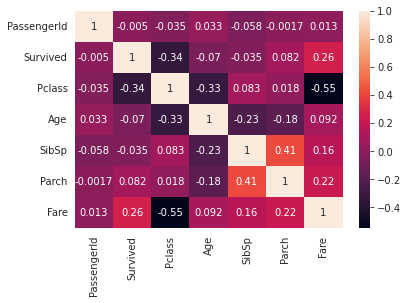

In [36]:
#Correlation with HeatMap visualization
sns.heatmap(train_df.corr(numeric_only=True), annot=True)

## Dataset is Balanced?

Text(0.5, 1.0, 'Training Data - Percentage of people survived and Deceased')

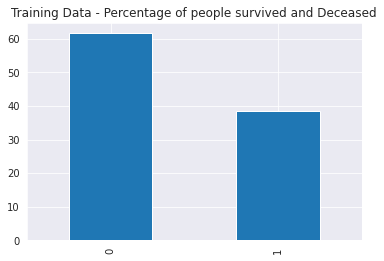

In [20]:
(train_df.Survived.value_counts(normalize=True) * 100).plot.bar().set_title("Training Data - Percentage of people survived and Deceased")


## Class and Survival Rate

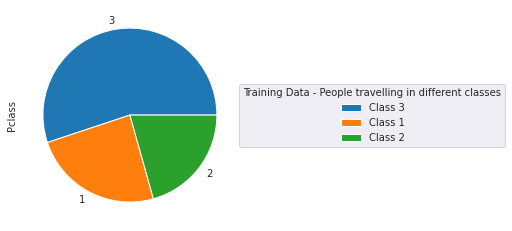

In [22]:
fig_pclass = train_df.Pclass.value_counts().plot.pie().legend(labels=["Class 3","Class 1","Class 2"], loc='center right', bbox_to_anchor=(2.25, 0.5)).set_title("Training Data - People travelling in different classes")


Pclass or passenger class represents the traveling class of commuter. There were three classes. In the combined dataset, a clear majority (709) traveled in the third class, followed by the second (277) and then the first (323).

The number of passengers in the third class was more than the number of passengers in first and second class combined.

Text(0.5, 1.0, 'Training Data - Percentage of people survived on the basis of class')

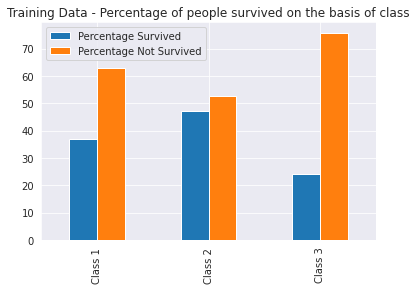

In [24]:
pclass_1_survivor_distribution = round((train_df[train_df.Pclass == 1].Survived == 1).value_counts()[1]/len(train_df[train_df.Pclass == 1]) * 100, 2)
pclass_2_survivor_distribution = round((train_df[train_df.Pclass == 2].Survived == 1).value_counts()[1]/len(train_df[train_df.Pclass == 2]) * 100, 2)
pclass_3_survivor_distribution = round((train_df[train_df.Pclass == 3].Survived == 1).value_counts()[1]/len(train_df[train_df.Pclass == 3]) * 100, 2)
pclass_perc_df = pd.DataFrame(
    { "Percentage Survived":{"Class 1": pclass_1_survivor_distribution,"Class 2": pclass_2_survivor_distribution, "Class 3": pclass_3_survivor_distribution},
     "Percentage Not Survived":{"Class 1": 100-pclass_1_survivor_distribution,"Class 2": 100-pclass_2_survivor_distribution, "Class 3": 100-pclass_3_survivor_distribution}})
pclass_perc_df.plot.bar().set_title("Training Data - Percentage of people survived on the basis of class")

More than 40% of the first class passengers were rescued. The pattern differed for the second and third class survivors as roughly around 70% of the second class passengers lost their lives. The numbers skyrocketed for the third class passengers. More than 80% of the third class passengers couldn't survive the disaster.

## Sex and Survival Rate

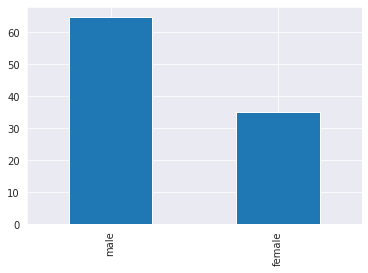

In [28]:
fig_sex = (train_df.Sex.value_counts(normalize = True) * 100).plot.bar()

<Axes: >

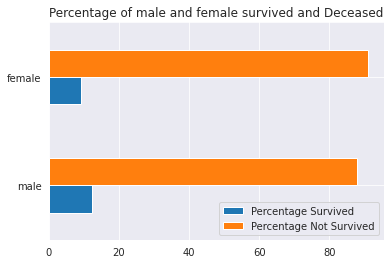

In [30]:
male_pr = round((train_df[train_df.Sex == 'male'].Survived == 1).value_counts()[1]/len(train_df.Sex) * 100, 2)
female_pr = round((train_df[train_df.Sex == 'female'].Survived == 1).value_counts()[1]/len(train_df.Sex) * 100, 2)
sex_perc_df = pd.DataFrame(
    { "Percentage Survived":{"male": male_pr,"female": female_pr},  "Percentage Not Survived":{"male": 100-male_pr,"female": 100-female_pr}})
sex_perc_df.plot.barh().set_title("Percentage of male and female survived and Deceased")
fig_sex

Roughly around 65% of the tourists were male while the remaining 35% were female. However, the percentage of female survivors was higher than the number of male survivors.

More than 80% male passengers had to die as compared to around 70% female passengers.

## Age and Survival Rate

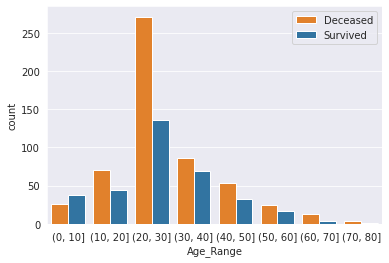

In [31]:
train_df['Age_Range'] = pd.cut(train_df.Age, [0, 10, 20, 30, 40, 50, 60,70,80])
sns.countplot(x = "Age_Range", hue = "Survived", data = train_df, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])

## Fare and Survival Rate

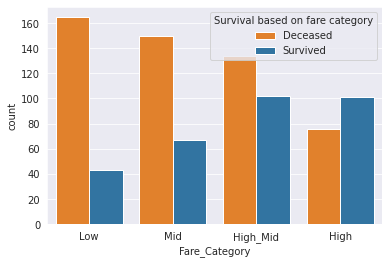

In [32]:
train_df['Fare_Category'] = pd.cut(train_df['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid',
                                                                                      'High_Mid','High'])


x = sns.countplot(x = "Fare_Category", hue = "Survived", data = train_df, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])
x.set_title("Survival based on fare category")

It is clear that there is a strong correlation between the fare and the survival. The higher a tourist paid, the higher would be his chances to survive.

## Embarked and Survival Rate

Text(0.5, 1.0, 'Training Data - Survival based on embarking point.')

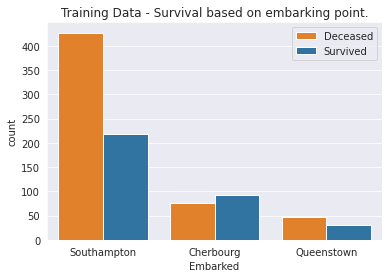

In [33]:
p = sns.countplot(x = "Embarked", hue = "Survived", data = train_df, palette=["C1", "C0"])
p.set_xticklabels(["Southampton","Cherbourg","Queenstown"])
p.legend(labels = ["Deceased", "Survived"])
p.set_title("Training Data - Survival based on embarking point.")

In combined data, more than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded from Queenstown.

More People who boarded from Cherbourg survived than those who died

## Converting and Creating New Features

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    int64   
 2   Pclass         891 non-null    int64   
 3   Name           891 non-null    object  
 4   Sex            891 non-null    object  
 5   Age            891 non-null    float64 
 6   SibSp          891 non-null    int64   
 7   Parch          891 non-null    int64   
 8   Ticket         891 non-null    object  
 9   Fare           891 non-null    float64 
 10  Cabin          891 non-null    object  
 11  Embarked       891 non-null    object  
 12  Age_Range      891 non-null    category
 13  Fare_Category  838 non-null    category
dtypes: category(2), float64(2), int64(5), object(5)
memory usage: 86.0+ KB


### Convert Fate to int

In [40]:
train_df['Fare'] = train_df['Fare'].astype(int)

# Binarize Gender

In [41]:
genders = {"male": 0, "female": 1}

train_df['Sex'] = train_df['Sex'].map(genders)

### Binarize Port

In [42]:
ports = {"S": 0, "C": 1, "Q": 2}

train_df['Embarked'] = train_df['Embarked'].map(ports)

### Set the Age in Category

In [43]:
train_df['Age'] = train_df['Age'].astype(int)
train_df.loc[ train_df['Age'] <= 11, 'Age'] = 0
train_df.loc[(train_df['Age'] > 11) & (train_df['Age'] <= 18), 'Age'] = 1
train_df.loc[(train_df['Age'] > 18) & (train_df['Age'] <= 22), 'Age'] = 2
train_df.loc[(train_df['Age'] > 22) & (train_df['Age'] <= 27), 'Age'] = 3
train_df.loc[(train_df['Age'] > 27) & (train_df['Age'] <= 33), 'Age'] = 4
train_df.loc[(train_df['Age'] > 33) & (train_df['Age'] <= 40), 'Age'] = 5
train_df.loc[(train_df['Age'] > 40) & (train_df['Age'] <= 66), 'Age'] = 6
train_df.loc[ train_df['Age'] > 66, 'Age'] = 6

In [45]:
# See distribution
train_df['Age'].value_counts()

4    303
6    148
3    106
5    103
2     92
1     71
0     68
Name: Age, dtype: int64

### Fare Categorization

In [48]:
train_df.loc[ train_df['Fare'] <= 7.91, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare']   = 2
train_df.loc[(train_df['Fare'] > 31) & (train_df['Fare'] <= 99), 'Fare']   = 3
train_df.loc[(train_df['Fare'] > 99) & (train_df['Fare'] <= 250), 'Fare']   = 4
train_df.loc[ train_df['Fare'] > 250, 'Fare'] = 5
train_df['Fare'] = train_df['Fare'].astype(int)

In [47]:
# See distribution
train_df['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

## Dataset Creation X, y

In [49]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,0,X,0,"(20, 30]",Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,0,C85,1,"(30, 40]",High
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,0,X,0,"(20, 30]",Mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,0,C123,0,"(30, 40]",High
4,5,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,0,X,0,"(30, 40]",Mid


In [68]:
X = train_df.drop(["Survived", "Fare_Category", "Ticket", "PassengerId", "Name", "Age_Range", "Cabin"],axis=1)
y = train_df["Survived"]

In [69]:
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

(891, 7)
<class 'pandas.core.frame.DataFrame'>
(891,)
<class 'pandas.core.series.Series'>


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[88 17]
 [22 52]]


In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

